In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import plotly.graph_objects as go

In [2]:
genderData = "Resources/GenderData/Health02_S_Prevalence.csv"

data = pd.read_csv(genderData)

data.head()

,STATEFP,state.abb,state.name,State Cases,State Rate,Male Cases,Male Rate,Female Cases,Female Rate,Age Less than 50 Cases,Age Less than 50 Rate,Age 50-74 Cases,Age 50-74 Rate,Age 75 Plus Cases,Age 75 Plus Rate,Black Non-Hispanic Cases,Black Non-Hispanic Rate,Non-Black Other Cases,Non-Black Other Rate
0,1,AL,Alabama,30700,820,19400,1090,10500,540,9400,550,19800,1290,700,130,9400,990,20500,740
1,2,AK,Alaska,5200,950,3600,1230,1600,630,1300,440,3800,1730,100,220,200,1340,5000,940
2,4,AZ,Arizona,61500,1210,44400,1780,18800,730,16300,680,45400,2290,1400,200,4100,2060,59300,1210
3,5,AR,Arkansas,21800,970,14900,1360,6900,590,5800,560,15500,1700,500,150,4600,1380,17300,900
4,6,CA,California,318900,1080,225200,1550,98000,650,54800,370,254600,2240,13300,400,49400,2890,274400,990


In [21]:
#pull out gender-related columns to make new, relevant DF
df = data[['state.name','State Cases', 'State Rate','Male Cases', 'Male Rate', 'Female Cases', 'Female Rate']]
df

,state.name,State Cases,State Rate,Male Cases,Male Rate,Female Cases,Female Rate
0,Alabama,30700,820,19400,1090,10500,540
1,Alaska,5200,950,3600,1230,1600,630
2,Arizona,61500,1210,44400,1780,18800,730
3,Arkansas,21800,970,14900,1360,6900,590
4,California,318900,1080,225200,1550,98000,650
5,Colorado,36300,880,25100,1230,10900,530
6,Connecticut,18300,650,12900,950,4900,340
7,Delaware,6300,860,4300,1220,2000,520
8,"Washington, D.C.",12700,2340,7900,3130,5200,1780
9,Florida,151000,950,104300,1360,46600,570


In [15]:
dfRate = data[['Male Rate','Female Rate']]
dfRate.head()

,Male Rate,Female Rate
0,1090,540
1,1230,630
2,1780,730
3,1360,590
4,1550,650


### add up rate and cases

In [5]:
sum = df.sum()
sum

state.name      AlabamaAlaskaArizonaArkansasCaliforniaColorado...
State Cases                                               2267000
State Rate                                                  47690
Male Cases                                                1555100
Male Rate                                                   67010
Female Cases                                               714500
Female Rate                                                 29660
dtype: object

In [6]:
#male specific 
male = df['Male Rate']

#female specific
female = df['Female Rate']

#state specific
state = df['State Rate']

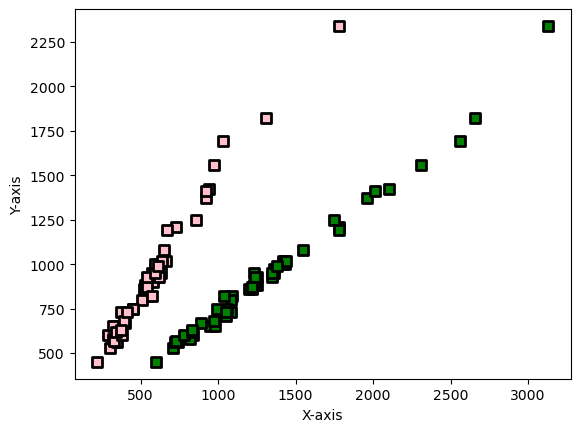

In [7]:
plt.scatter(male, state, c ="green",
            linewidths = 2,
            marker ="s",
            edgecolor ="black",
            s = 50)
 
plt.scatter(female, state, c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="black",
            s = 50)
 
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [8]:
#male specific 
sumMale = df['Male Rate'].sum()

#female specific
sumFemale = df['Female Rate'].sum()

#state specific
sumState = df['State Rate'].sum()

<AxesSubplot:>

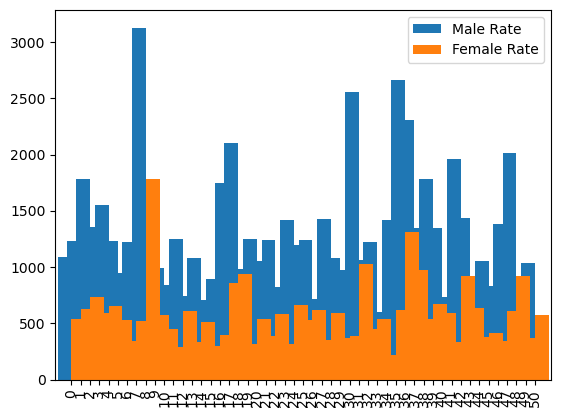

In [20]:
# dfRate.plot(x='state.name',
#         kind='bar',
#         width = 3,
#         stacked=False,
#         title='Male vs. Female Rate')

dfRate.plot(kind = 'bar',
           width = 3)

### Create map to visualize states and gender rates

In [10]:
#mapping test
fig = go.Figure(data=go.Choropleth(
    locations=df_sort_descend['st_abb'], # Spatial coordinates
    z = df_sort_descend['odMortRtAv'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Average Rate per 100,000",
))

fig.update_layout(
    title_text = 'Opioid Mortality Rate',
    geo_scope='usa', # limit map scope to USA
)

fig.show()


NameError: name 'df_sort_descend' is not defined

### 

### 